In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=300)

In [4]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [5]:
len(x_train[0])

218

In [6]:
from sklearn.model_selection import train_test_split
x_input,x_val,y_input,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [7]:
lengths = [len(x) for x in x_input]

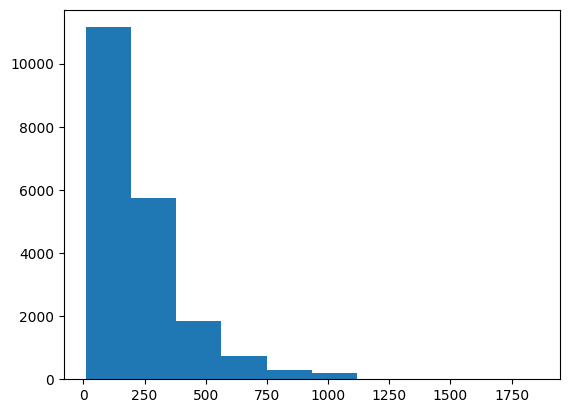

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.show()

In [9]:
# 문장의 길이가 다르므로 학습을 위해 길이를 맞춘다
temp = [
    [1,2,3,4],
    [1,2,3],
    [1,2,3,4,5,6,7,8,9],
    [1,2,3,4,5,6]
]
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
temp2 = pad_sequences(temp,maxlen=10)
temp2

array([[0, 0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 3],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 0, 0, 0, 1, 2, 3, 4, 5, 6]], dtype=int32)

In [11]:
train_seq =  pad_sequences(x_input, maxlen = 100)
val_seq =  pad_sequences(x_val, maxlen = 100)

train_seq.shape, val_seq.shape

((20000, 100), (5000, 100))

In [12]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [13]:
from tensorflow import keras
train_oh = keras.utils.to_categorical(train_seq)  # one-hot encoding
val_oh = keras.utils.to_categorical(val_seq)  # one-hot encoding
train_oh.shape, val_oh.shape

((20000, 100, 300), (5000, 100, 300))

순환신경망

In [14]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,300)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, y_input,epochs=100,validation_data=(val_oh, y_val),
                    batch_size=64,callbacks=[checkpoint_cb,early_stopping_cb])